In [1]:
import pandas as pd

### 데이터 확인

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 구조

- PassengerId : 승객 id, 1부터 시작하는 인덱스 번호
- Survived : 생존여부. 0 - 사망, 1 - 생존
- Pclass : 티켓등급. 1 - 1등석, 2 - 2등석, 3 - 3등석
- Name : 승객이름
- Sex : 성별, maie - 남성, female - 여성
- Age : 나이
- SibSp : 동승한 형제 자매의 수
- Parch : 동승한 부모 자식의 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 탑승한 선착장, C - Cherbourg, Q - Queenstown, S - Southampton

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 행열의 수
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
# 데이터 프레임 전체 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

# 시각화 함수
def bar_chart(feature) :
    # 특성에 따라 생존자 수를 구한다.
    survived_df = train_df[train_df['Survived'] == 1][feature]
    survived = survived_df.value_counts()
    
    dead_df = train_df[train_df['Survived'] == 0][feature]
    dead = dead_df.value_counts()
    
    # 시각화를 위해 데이터프레임을 생성한다.
    df = pd.DataFrame([survived, dead])
    # 인덱스
    df.index = ['Survived', 'Dead']
    # 그린다.
    df.plot(kind='bar', figsize=(10, 5))
    
# 결측치, 최대, 최소 수 확인
def show_info(feature) :
    print(f"결측치 수 : {train_df[feature].isnull().sum()}")
    print(f"최대 수 : {train_df[feature].max()}")
    print(f"최소 수 : {train_df[feature].min()}")
    print(train_df[feature].value_counts())
    print(train_df[feature].drop_duplicates().values)

### Pclass (티켓 등급)

In [12]:
show_info('Pclass')

결측치 수 : 0
최대 수 : 3
최소 수 : 1
3    491
1    216
2    184
Name: Pclass, dtype: int64
[3 1 2]


결측치 수가 0이고 스케일이 크지 않기 때문에 전처리는 하지 않는다.

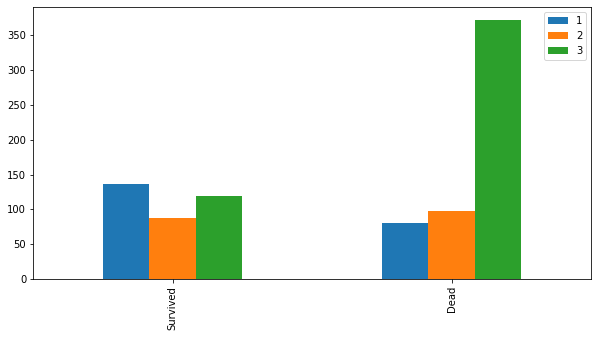

In [13]:
bar_chart('Pclass')

3등석일 수록 사망할 확률이 높다.

### Sex (성별)

In [14]:
show_info('Sex')

결측치 수 : 0
최대 수 : male
최소 수 : female
male      577
female    314
Name: Sex, dtype: int64
['male' 'female']


결측치가 존재하지 않다. 값이 문자열로 되어 있기 때문에 숫자로 변환하는 전처리가 필요하다.

남자를 0, 여자를 1로 변경한다

In [15]:
sex_mapping = {
    'male' : 0,
    'female' : 1
}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

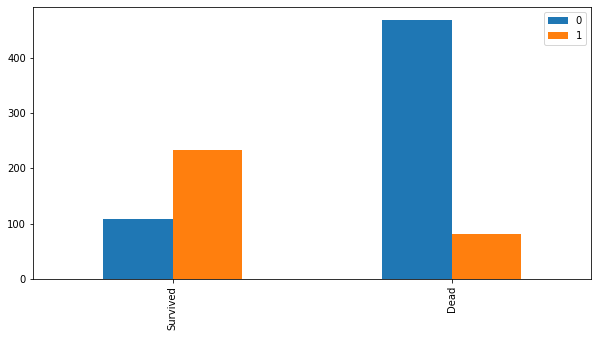

In [16]:
bar_chart('Sex')

남자가 여자보다 사망할 확률이 높다

### Age (나이)

In [17]:
show_info('Age')

결측치 수 : 177
최대 수 : 80.0
최소 수 : 0.42
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


결측치가 177개이고 스케일도 크다.

Name 특성에 있는 중간 이름을 통해 나이를 추정하도록 한다.

In [66]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [74]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Sir           1
Don           1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [75]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [76]:
title_map = {
    'Mr' : 0, 'Miss' : 1, 'Mrs' : 2,
    'Master' : 3, 'Dr' : 4, 'Rev' : 4,
    'Mlle' : 4, 'Major' : 4, 'Col' : 4,
    'Ms' : 4, 'Sir' : 4, 'Don' : 4, 'Capt' : 4,
    'Lady' : 4, 'Mme' : 4, 'Jonkheer' : 4, 'Countess' : 4,
    'Dona' : 4
}

train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)

In [78]:
train_df['Title'].value_counts()

0    517
1    182
2    125
3     40
4     27
Name: Title, dtype: int64

title별 나이 중간값을 결측치로 채워준다.

In [38]:
train_df['Age'].fillna(train_df.groupby()'Title')['Age'].transform('median'),inplace=True)
test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'),inplace=True)

KeyError: 'Title'